In [1]:
!pip install --upgrade kiteconnect
!pip install python-dotenv
!pip install python-dateutil

In [9]:
# hack to import parent utilities
import sys 
sys.path.append('..')

import logging
import os
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
import dateutil
import pandas as pd

from libstonks import kite_historical

In [3]:
instruments_df_nse_eq = kite_historical.get_instrument_list(exchange=kite_historical.INSTRUMENT_EXCHANGE_NSE, instrument_type=kite_historical.INSTRUMENT_TYPE_EQ)
instruments_df_nse_eq

,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
0,264713,1034,HANGSENG BEES-NAV,HANGSENG BEES-NAV,0.0,NaN,0.0,0.00,0,EQ,INDICES,NSE
1,264969,1035,INDIA VIX,INDIA VIX,0.0,NaN,0.0,0.00,0,EQ,INDICES,NSE
2,260617,1018,NIFTY 100,NIFTY 100,0.0,NaN,0.0,0.00,0,EQ,INDICES,NSE
3,264457,1033,NIFTY 200,NIFTY 200,0.0,NaN,0.0,0.00,0,EQ,INDICES,NSE
4,256265,1001,NIFTY 50,NIFTY 50,0.0,NaN,0.0,0.00,0,EQ,INDICES,NSE
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,1945089,7598,ZODJRDMKJ-BE,ZODIAC JRD MKJ-,0.0,NaN,0.0,0.05,1,EQ,NSE,NSE
3909,2916865,11394,ZOTA,ZOTA HEALTH CARE,0.0,NaN,0.0,0.05,1,EQ,NSE,NSE
3910,7436801,29050,ZUARI,ZUARI AGRO CHEMICALS,0.0,NaN,0.0,0.05,1,EQ,NSE,NSE
3911,979713,3827,ZUARIGLOB,ZUARI GLOBAL,0.0,NaN,0.0,0.05,1,EQ,NSE,NSE


RELIANCE
---------------------


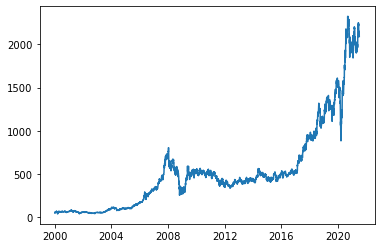

RELIANCE21JUL1360CE
RELIANCE21JUL1360PE
RELIANCE21JUL1380CE
RELIANCE21JUL1380PE
RELIANCE21JUL1400CE
RELIANCE21JUL1400PE
RELIANCE21JUL1420CE
RELIANCE21JUL1420PE
RELIANCE21JUL1440CE
RELIANCE21JUL1440PE
RELIANCE21JUL1460CE
RELIANCE21JUL1460PE
RELIANCE21JUL1480CE
RELIANCE21JUL1480PE
RELIANCE21JUL1500CE
RELIANCE21JUL1500PE
RELIANCE21JUL1520CE
RELIANCE21JUL1520PE
RELIANCE21JUL1540CE
RELIANCE21JUL1540PE
RELIANCE21JUL1560CE
RELIANCE21JUL1560PE
RELIANCE21JUL1580CE
RELIANCE21JUL1580PE
RELIANCE21JUL1600CE
RELIANCE21JUL1600PE
RELIANCE21JUL1620CE
RELIANCE21JUL1620PE
RELIANCE21JUL1640CE
RELIANCE21JUL1640PE
RELIANCE21JUL1660CE
RELIANCE21JUL1660PE
RELIANCE21JUL1680CE
RELIANCE21JUL1680PE
RELIANCE21JUL1700CE
RELIANCE21JUL1700PE
RELIANCE21JUL1720CE
RELIANCE21JUL1720PE
RELIANCE21JUL1740CE
RELIANCE21JUL1740PE
RELIANCE21JUL1760CE
RELIANCE21JUL1760PE
RELIANCE21JUL1780CE
RELIANCE21JUL1780PE
RELIANCE21JUL1800CE
RELIANCE21JUL1800PE
RELIANCE21JUL1820CE
RELIANCE21JUL1820PE
RELIANCE21JUL1840CE
RELIANCE21JUL1840PE


In [11]:
instruments_to_focus = instruments_df_nse_eq[instruments_df_nse_eq[kite_historical.INSTRUMENT_KEY_TRADINGSYMBOL]=="RELIANCE"]
for idx, instrument in instruments_to_focus.iterrows():
    print(instrument[kite_historical.INSTRUMENT_KEY_TRADINGSYMBOL])
    print("---------------------")
    instrument_history = kite_historical.get_instrument_history(instrument)
    instrument_history["date"] = instrument_history["date"].apply(lambda x: dateutil.parser.parse(x))
    plt.plot(instrument_history["date"], instrument_history["close"])
    plt.show()
    options_df = kite_historical.get_options_for_instrument(instrument)
    if len(options_df)>0:
        for idx_opt, option_instrument in options_df.iterrows():
            print(option_instrument[kite_historical.INSTRUMENT_KEY_TRADINGSYMBOL])